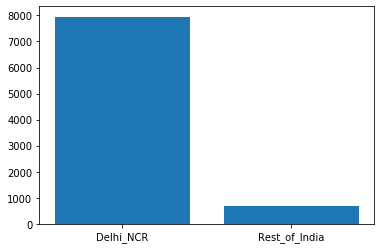

In [36]:
"""
The dataset is highly skewed toward the cities included in Delhi-NCR. 
So, we will summarise all the other cities in Rest of India while those in New Delhi, 
Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our 
analysis turn toward Delhi-NCR v Rest of India.

1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.
"""





# Packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load Dataset
zomato_df =  pd.read_csv("zomato_utf.csv")
# Only Indian Restaurants
zomato_df = zomato_df[zomato_df['Country Code']==1]

# Delhi-NCR cities 
delhi_ncr = {'New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'}
# 
cities_group_restaurant_count = {'Delhi_NCR':0,'Rest_of_India':0}

def city(city_name):
    if city_name in delhi_ncr:
        cities_group_restaurant_count['Delhi_NCR']+=1
        return "Delhi_NCR"
    else:
        cities_group_restaurant_count['Rest_of_India']+=1
        return "Rest_of_India"

# Update city_name with group name for future use.
zomato_df_with_group_city = zomato_df.copy()
zomato_df_with_group_city['City'] = zomato_df_with_group_city['City'].apply(city)


group_name = []
restaurant_count = []
for key,value in cities_group_restaurant_count.items():
    group_name.append(key)
    restaurant_count.append(value)


plt.bar(group_name,restaurant_count)
plt.xticks(rotation=0)
plt.show()




In [40]:
"""
2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR 
or just it due to incomplete dataset.

Answer : With given dataset I have found four cuisine names where are not present in Delhi-NCR restaurants and they are
German Cajun Malwani BBQ but after checking with Zomato API I have found that some of them are present in Delhi-NCR
restaurants. So dataset have some missing data. 



"""
zomato_df_with_group_city["City_Cuisines"] = zomato_df_with_group_city['City'] + "###" + zomato_df_with_group_city['Cuisines']

# Store cuisines depending on their city 
restaurant_cuisines = set()
delhi_ncr_cuisines = set()

def city_cuisines(cuisines):
    city = cuisines.split("###")[0]
    cuisines = cuisines.split("###")[1].split(", ")
    if city=="Delhi_NCR":
        for cuisine in cuisines:
            delhi_ncr_cuisines.add(cuisine)
    else:
        for cuisine in cuisines:
            restaurant_cuisines.add(cuisine)
    return cuisines
            

zomato_df_with_group_city["City_Cuisines"].apply(city_cuisines)

cuisines_not_in_delhi_ncr = []
for cuisine in restaurant_cuisines:
    if cuisine in delhi_ncr_cuisines:
        continue
    else:
        cuisines_not_in_delhi_ncr.append(cuisine)



print(*cuisines_not_in_delhi_ncr)
        
        
# Verify with zomato's actual data
headers = {'user-key': '1916a1cbf9ae3cca094d599c14b5bd23'}
url = "https://developers.zomato.com/api/v2.1/cuisines?city_id=1"
response = requests.get(url,headers=headers)
cuisines = response.json()['cuisines']

# Indicates whether cuisine present in Delhi-NCR or not
check_present = False
for cuisine in cuisines:
    if cuisine['cuisine']['cuisine_name'] in cuisines_not_in_delhi_ncr:
        check_present = True
        break
        
check_present



German Cajun Malwani BBQ


True

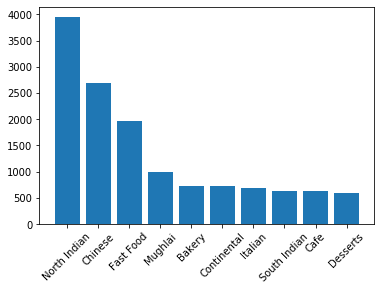

In [48]:
"""
3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

Answer: Top ten cuisines that are being servered in Delhi-NCR and Rest of India are 
a. North Indian
b. Chinese
c. Fast Food
d. Mughlai
e. Bakery
f. Contental
g. Italian
h. South Indian
i. Cafe
j. Desserts
"""

cuisines_with_count = {}

def get_cuisines(cuisines):
#     print(type(cuisines))
    list_cuisines = cuisines.split(", ")
    for cuisine in list_cuisines:
        cuisines_with_count[cuisine] = cuisines_with_count.get(cuisine,0)+1

zomato_df_with_group_city['Cuisines'].apply(get_cuisines)
cuisine_name_count = []
for key,value in cuisines_with_count.items():
    cuisine_name_count.append([value,key])

cuisine_name_count.sort(reverse = True)


cuisines = [ i[1] for i in cuisine_name_count[:10]]
counts = [ i[0] for i in cuisine_name_count[:10]]

plt.bar(cuisines,counts)
plt.xticks(rotation=45)
plt.show()
